<a href="https://colab.research.google.com/github/varunbairagi/Machine-Learning-CT62/blob/main/2_table_varunLinear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
class MyLinearRegression:
    def __init__(self, weight=1.9989, bias=0.0011, learning_rate=0.01,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
        'Scores':[2,4,5,8,12,12,11,16,18,21,22,16,26,28,30,31,36,36,38,40]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,1,2
1,2,4
2,3,5
3,4,8
4,5,12
5,6,12
6,7,11
7,8,16
8,9,18
9,10,21


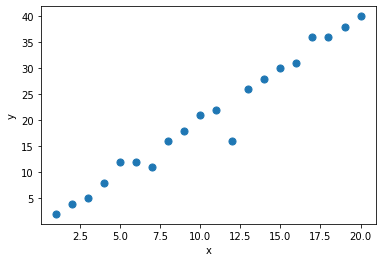

In [21]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
y=[2,4,5,8,12,12,11,16,18,21,22,16,26,28,30,31,36,36,38,40]
plt.scatter(x,y,s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20]]),
 array([ 2,  4,  5,  8, 12, 12, 11, 16, 18, 21, 22, 16, 26, 28, 30, 31, 36,
        36, 38, 40]))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [1.8921392]	 Bias: [-0.00937013]	 Cost: 2.9534271444289995
Iteration: 1	 Weight: [2.0583462]	 Bias: [0.00157895]	 Cost: 3.3366625005124315
Iteration: 2	 Weight: [1.80065542]	 Bias: [-0.02071074]	 Cost: 4.26115927522482
Iteration: 3	 Weight: [2.20124027]	 Bias: [0.00863993]	 Cost: 6.490930539601112
Iteration: 4	 Weight: [1.57957683]	 Bias: [-0.04217927]	 Cost: 11.86842952701253
Iteration: 5	 Weight: [2.54537684]	 Bias: [0.03152172]	 Cost: 24.836818298396437
Iteration: 6	 Weight: [1.04597836]	 Bias: [-0.08812358]	 Cost: 56.11098973696412
Iteration: 7	 Weight: [3.37482316]	 Bias: [0.09250452]	 Cost: 131.5304085699196
Iteration: 8	 Weight: [-0.24127237]	 Bias: [-0.19314377]	 Cost: 313.40815102793385
Iteration: 9	 Weight: [5.37462061]	 Bias: [0.24531855]	 Cost: 752.0151112443796
Iteration: 10	 Weight: [-3.34598671]	 Bias: [-0.44067911]	 Cost: 1809.7365699271506
Iteration: 11	 Weight: [10.19677849]	 Bias: [0.61953716]	 Cost: 4360.481559336061
Iteration: 12	 Weight: [-10

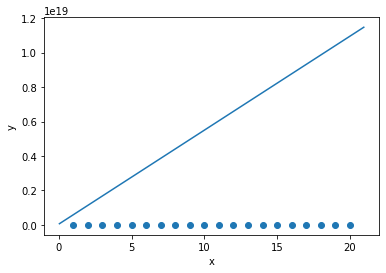

In [24]:
w = regressor.weight
b = regressor.bias
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
y=[2,4,5,8,12,12,11,16,18,21,22,16,26,28,30,31,36,36,38,40]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()